###### https://nbviewer.jupyter.org/github/jmportilla/
###### https://nbviewer.jupyter.org/github/jmportilla/Udemy-notes/blob/master/Data%20Project%20-%20Election%20Analysis.ipynb

## Election Data Project - Polls and Donors

Looking at data from the 2012 election

List of questions:
1. Who was being polled and what was their party affiliation?
2. Did the poll results favor Romney or Obama?
3. How do undecided voters effect the poll?
4. Can we account for the undecided voters?
5. How did voter sentiment change over time?
6. Can we see an effect in the polls from the debates?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# Way of using SringIO and requests.

# Use to grab data from the web
import requests

# To work with the csv file
from io import StringIO

url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

source = requests.get(url).text

poll_data = StringIO(source)

# Set poll data as pandas DataFrame
poll_df = pd.read_csv(poll_data)

# Let's get a glimpse at the data
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                586 non-null    object 
 1   Start Date              586 non-null    object 
 2   End Date                586 non-null    object 
 3   Entry Date/Time (ET)    586 non-null    object 
 4   Number of Observations  564 non-null    float64
 5   Population              586 non-null    object 
 6   Mode                    586 non-null    object 
 7   Obama                   586 non-null    float64
 8   Romney                  586 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            586 non-null    object 
 12  Source URL              584 non-null    object 
 13  Partisan                586 non-null    object 
 14  Affiliation             586 non-null    ob

In [3]:
# directly import csv file from the url with pd.read_csv
poll_df = pd.read_csv('http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv')
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                586 non-null    object 
 1   Start Date              586 non-null    object 
 2   End Date                586 non-null    object 
 3   Entry Date/Time (ET)    586 non-null    object 
 4   Number of Observations  564 non-null    float64
 5   Population              586 non-null    object 
 6   Mode                    586 non-null    object 
 7   Obama                   586 non-null    float64
 8   Romney                  586 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            586 non-null    object 
 12  Source URL              584 non-null    object 
 13  Partisan                586 non-null    object 
 14  Affiliation             586 non-null    ob

In [4]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


### 1. Who was being polled and what was their party affiliation?

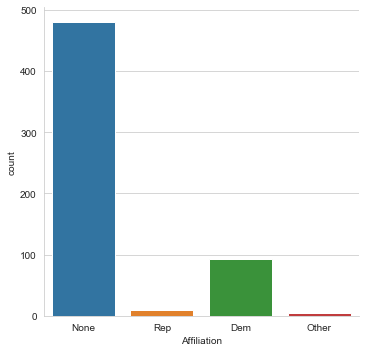

In [5]:
# visualization overview of the affiliation for the polls.
sns.catplot("Affiliation", data = poll_df, kind = 'count')

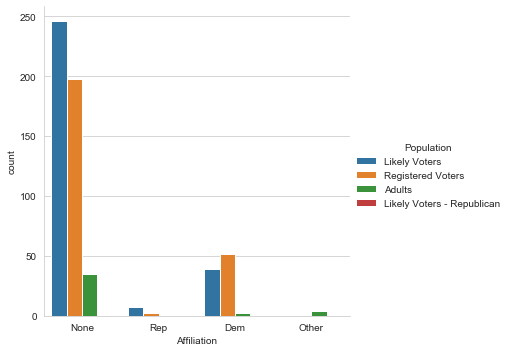

In [6]:
# Afflication and Population
sns.catplot("Affiliation", data = poll_df, hue = 'Population', kind = 'count')

### 2. Did the poll results favor Romney or Obama?

In [7]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


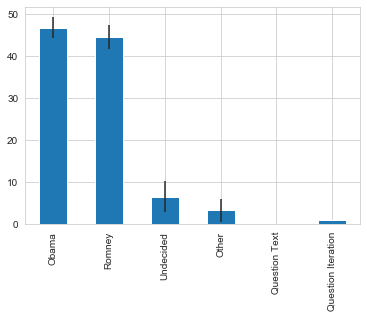

In [8]:
# First we'll get the average
avg = pd.DataFrame(poll_df.mean()) 
avg.drop('Number of Observations',axis=0,inplace=True)

# After that let's get the error
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations',axis=0,inplace=True)

# now plot using pandas built-in plot, with kind='bar' and yerr='std'
avg.plot(yerr=std,kind='bar',legend=False)

In [9]:
# add avg and std
poll_avg = pd.concat([avg,std], axis = 1)
poll_avg.columns = ['Average','STD']
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726
Question Text,NaN,NaN
Question Iteration,1.000000,0.000000


### 3. How do undecided voters effect the poll?

In [10]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


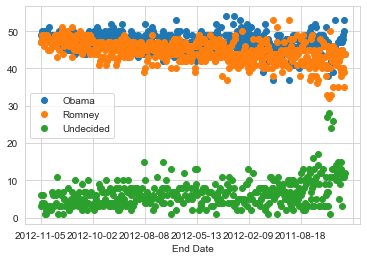

In [11]:
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],marker='o',linestyle='')

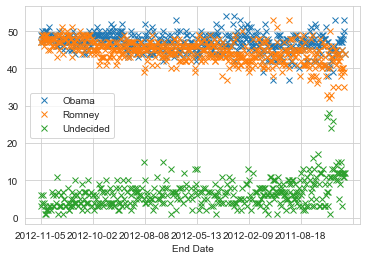

In [12]:
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],marker='x',linestyle='')

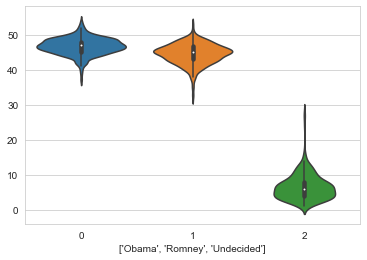

In [13]:
violin = sns.violinplot(data =[poll_df.Obama, poll_df.Romney, poll_df.Undecided])
violin.set(xlabel = ['Obama','Romney','Undecided'])
violin

#### Difference between Obama and Romney

In [14]:
from datetime import datetime

In [15]:
# Create a new column for the difference between the two candidates
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100
# Preview the new column
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


In [16]:
poll_df = poll_df.groupby(['Start Date']).mean()

In [17]:
poll_df.sort_values(by = ['Start Date'], ascending = True, inplace = True)
poll_df.head()

,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
Start Date,,,,,,,,
2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


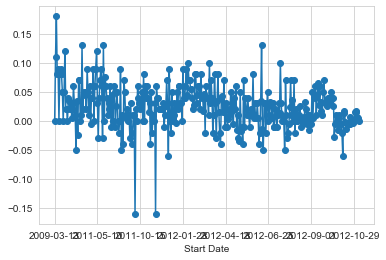

In [18]:
# Plotting the difference in polls between Obama and Romney
# 1
poll_df.set_index(poll_df.index)['Difference'].plot(marker='o')

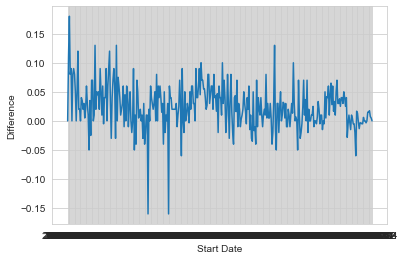

In [19]:
# 2
sns.lineplot(x = poll_df.index, y = "Difference", data = poll_df)

In [20]:
## Using index is too hard;;;
## So I copied index and copied it to the new feature called "date"
poll_df['date'] = poll_df.index
poll_df['date'] = pd.to_datetime(poll_df['date'])

(734777.0, 734808.0)

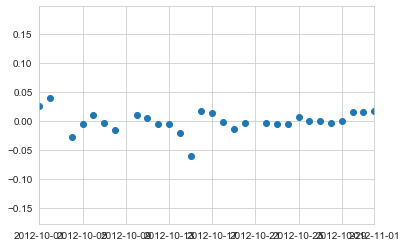

In [21]:
# zoom in on the month of October.
# 1
from datetime import date

fig, ax = plt.subplots()
ax.plot_date(poll_df.date, poll_df.Difference)
ax.set_xlim(date(2012,10,1), date(2012,11,1))

(734777.0, 734808.0)

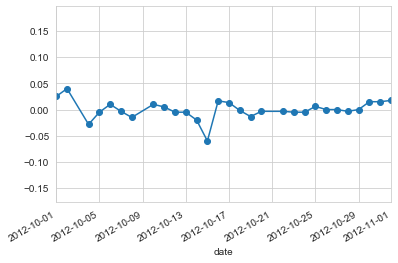

In [22]:
# 2
poll_df.set_index(poll_df.date)['Difference'].plot(marker='o')
plt.xlim(date(2012,10,1), date(2012,11,1))

### Donor Dataset

In [24]:
poll_df.head()

,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference,date
Start Date,,,,,,,,,
2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00,2009-03-13
2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11,2009-04-17
2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18,2009-05-14
2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08,2009-06-12
2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09,2009-07-15
